In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np

In [4]:
# Read the file we are going to use

diabetes_df = pd.read_csv("Resources/diabetes_risk_prediction_dataset.csv")
diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
# Change the name of "class" to "Diabetic"
# This is the column that shows a positive or negative diagnosis for diabetets

diabetes_df.rename(columns = {"class": "Diabetes"}, inplace = True)
diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
# Separate the Features (X) from the target (y)
# The result (y) is the outcome of the features
# The rest of the columns besides the result will be the features (X)

y = diabetes_df["Diabetes"]

X = diabetes_df.drop(columns = "Diabetes")

In [7]:
# Convert the features of the categorical variables into booleans

diabetes_dummy_df = pd.get_dummies(X, drop_first = True)

diabetes_dummy_df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,False,True,True,True,False,True,False,False,True,False,True,True,False,False,False
516,48,False,True,True,True,True,True,False,False,True,True,True,True,False,False,False
517,58,False,True,True,True,True,True,False,True,False,False,False,True,True,False,True
518,32,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False


In [8]:
# Change the name of each column

diabetes_dummy_df = diabetes_dummy_df.rename(columns = {"Polyuria_Yes": "Polyuria",
                                         "Polydipsia_Yes": "Polydipsia",
                                         "sudden weight loss_Yes": "Sudden Weight Loss",
                                         "weakness_Yes": "Weakness",
                                         "Polyphagia_Yes": "Polyphagia",
                                         "Genital thrush_Yes": "Genital Thrush",
                                         "visual blurring_Yes": "Visual Blurring",
                                         "Itching_Yes": "Itching",
                                         "Irritability_Yes": "Irritability",
                                         "delayed healing_Yes": "Delayed Healing",
                                         "partial paresis_Yes": "Partial Paresis",
                                         "muscle stiffness_Yes": "Muscle Stiffness",
                                         "Alopecia_Yes": "Alopecia",
                                         "Obesity_Yes": "Obesity"
})

diabetes_dummy_df

,Age,Gender_Male,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,False,True,True,True,False,True,False,False,True,False,True,True,False,False,False
516,48,False,True,True,True,True,True,False,False,True,True,True,True,False,False,False
517,58,False,True,True,True,True,True,False,True,False,False,False,True,True,False,True
518,32,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False


In [9]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(diabetes_dummy_df, y)

In [10]:
# Create a Logistic Regression model

classifier = LogisticRegression()

# Fit (train) or model using the training data
# diabetes_dummy_df needs to be used as the X since the gender has ben converted to represent one column and as a boolean

classifier.fit(X_train, y_train)

C:\Users\brend\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# Score the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9102564102564102
Testing Data Score: 0.9846153846153847


In [12]:
# Make predictions

predictions = classifier.predict(X_test)

results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop = True)

results

,Prediction,Actual
0,Negative,Positive
1,Positive,Positive
2,Positive,Positive
3,Positive,Positive
4,Positive,Positive
...,...,...
125,Negative,Negative
126,Negative,Negative
127,Positive,Positive
128,Positive,Positive


In [13]:
# Calculate the accuracy score
# Display the accuracy score for the test dataset

accuracy_score(y_test, predictions)

0.9846153846153847

In [15]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98        43
    Positive       1.00      0.98      0.99        87

    accuracy                           0.98       130
   macro avg       0.98      0.99      0.98       130
weighted avg       0.99      0.98      0.98       130



[[43  0]
 [ 2 85]]


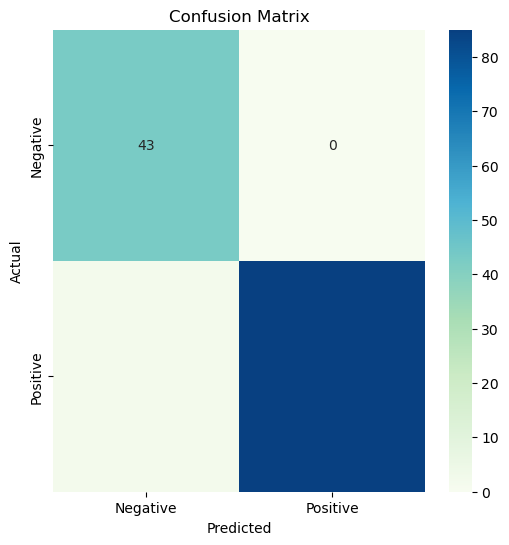

<Figure size 640x480 with 0 Axes>

In [20]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print(cm)

# Convert the confusion matrix to a dataframe

cm_df = pd.DataFrame(
    cm, index = ["Negative", "Positive"],
    columns = ["Negative", "Positive"]
)

# Create a heatmap for the confusion matrix

import seaborn as sns

plt.figure(figsize = (6, 6))
sns.heatmap(cm_df, annot = True, fmt = 'd', cmap = 'GnBu', cbar = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.style.use('dark_background')
plt.show()

In [23]:
import joblib

joblib.dump(classifier, 'Diabetes_Model.pkl')

['Diabetes_Model.pkl']

In [24]:
import pickle

# Save the trained model as a .pkl file
with open('Diabetes_Model.pkl', 'wb') as Diabetes_Model:
    pickle.dump(classifier, Diabetes_Model)